In [93]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

In [94]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [95]:
y = np.array([[1], [0], [0], [1]])
y

array([[1],
       [0],
       [0],
       [1]])

In [96]:
neuronios_entrada = 2
neuronios_oculta = 3
neuronios_saida = 1

In [97]:
W = {'oculta': tf.Variable(tf.random_normal([neuronios_entrada, neuronios_oculta]), name = 'w_oculta'),
     'saida': tf.Variable(tf.random_normal([neuronios_oculta, neuronios_saida]), name = 'w_saida')}

In [98]:
W['oculta']

<tf.Variable 'w_oculta_5:0' shape=(2, 3) dtype=float32_ref>

In [99]:
W['saida']

<tf.Variable 'w_saida_5:0' shape=(3, 1) dtype=float32_ref>

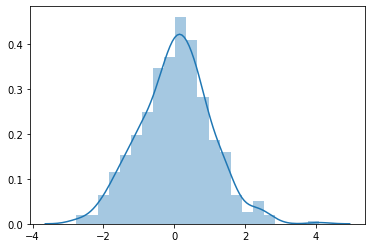

In [100]:
distribuicao = np.random.normal(size = 500)
distribuicao
import seaborn as sns
sns.distplot(distribuicao)

In [101]:
b = {'oculta': tf.Variable(tf.random_normal([neuronios_oculta]), name = 'b_oculta'),
    'saida': tf.Variable(tf.random_normal([neuronios_saida]), name = 'b_saida')}

In [102]:
xph = tf.placeholder(tf.float32, [4, neuronios_entrada], name = 'xph')
yph = tf.placeholder(tf.float32, [4, neuronios_saida], name = 'yph')

In [103]:
camada_oculta = tf.add(tf.matmul(xph, W['oculta']), b['oculta'])
camada_oculta_ativacao = tf.sigmoid(camada_oculta)
camada_saida = tf.add(tf.matmul(camada_oculta_ativacao, W['saida']), b['saida'])
camada_saida_ativacao = tf.sigmoid(camada_saida)
erro = tf.losses.mean_squared_error(yph, camada_saida_ativacao)
otimizador = tf.train.GradientDescentOptimizer(learning_rate=0.3).minimize(erro)

In [104]:
init = tf.global_variables_initializer()

In [105]:
with tf.Session() as sess:
    sess.run(init)
    #print(sess.run(W['oculta']))
    #print(sess.run(W['saida']))
    #print(sess.run(b['oculta']))
    #print('\n')
    #print(sess.run(b['saida']))
    #print(sess.run(camada_saida_ativacao, feed_dict = {xph: X}))
    for epocas in range(15000):
      erro_medio = 0
      _, custo = sess.run([otimizador, erro], feed_dict= {xph: X, yph: y})
      if epocas % 200 == 0:
        #print(custo)
        erro_medio += custo / 4
        print(erro_medio)
    W_final, b_final = sess.run([W, b])

0.09066557139158249
0.06263292580842972
0.06250767409801483
0.06241285800933838
0.062279365956783295
0.062016479671001434
0.06144224852323532
0.060190264135599136
0.05771060287952423
0.05381694436073303
0.049268338829278946
0.04432787746191025
0.03511575609445572
0.021467313170433044
0.012397690676152706
0.007840736769139767
0.00545316468924284
0.0040710740722715855
0.003198078600689769
0.0026077409274876118
0.002186930039897561
0.001874313922598958
0.0016342883463948965
0.001445004832930863
0.0012924008769914508
0.0011670732637867332
0.00106251728720963
0.0009741096291691065
0.0008984783198684454
0.0008331129793077707
0.0007761142333038151
0.0007260103593580425
0.0006816535023972392
0.0006421336438506842
0.0006067166686989367
0.0005748140392825007
0.0005459373933263123
0.0005196856218390167
0.0004957248456776142
0.00047377333976328373
0.00045359533396549523
0.0004349882365204394
0.0004177792288828641
0.00040182058000937104
0.00038698362186551094
0.0003731547330971807
0.000360239297151

In [106]:
W_final

{'oculta': array([[ 4.9371777,  2.4206836, -6.0290766],
        [-5.1052256, -2.5928402,  5.8889194]], dtype=float32),
 'saida': array([[-7.4187927],
        [-2.5813239],
        [-8.741342 ]], dtype=float32)}

In [107]:
b_final

{'oculta': array([-2.8642852, -1.8036923, -3.2578804], dtype=float32),
 'saida': array([4.5694833], dtype=float32)}

In [108]:
camada_oculta_teste = tf.add(tf.matmul(xph, W_final['oculta']), b_final['oculta'])
camada_oculta_ativacao_teste = tf.sigmoid(camada_oculta_teste)
camada_saida_teste = tf.add(tf.matmul(camada_oculta_ativacao_teste, W_final['saida']), b_final['saida'])
camada_saida_ativacao_teste = tf.sigmoid(camada_saida_teste)

In [109]:
with tf.Session() as sess:
  sess.run(init)
  print(sess.run(camada_saida_ativacao_teste, feed_dict= {xph: X}))

[[0.9701258 ]
 [0.02611699]
 [0.02418229]
 [0.97419816]]
